### Random Vector/Vetor aleatório
https://www.probabilitycourse.com/chapter6/6_1_5_random_vectors.php <br>
When dealing with multiple random variables, it is sometimes useful to use vector and matrix notations. When we have n random variables X1, X2, ..., Xn we can put them in a (column) vector X <br>
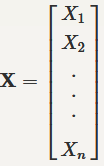
- We call X a **random vector**. Here X is an n-dimensional vector because it consists of n random variables. 

### Loss Function/Função de Custo
The function we want to minimize or maximize is called the **objective function** or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function.
- The loss function is the function that computes the distance between the current output of the algorithm and the expected output.
- Cross-entropy and mean squared error are the two main types of loss functions to use when training neural network models.
- At its core, a loss function is incredibly simple: It’s a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.

### Modelo de Regressão Linear
https://matheusfacure.github.io/2017/03/03/func-custo-regr/#func-obj 

#### Implementando no Pytorch
https://www.tutorialspoint.com/pytorch/pytorch_linear_regression.htm <br>

1. Vamos importar as bibliotecas 'numpy', 'matplotlib' e 'pandas':

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

2. Atribuindo valores para os coeficientes e utilizando 'np.random.rand(256)' para criar os 256 valores aleatórios de [0~1] que irá compor os dados de x.

In [15]:
A = 2 # coeficiente angular
B = 3 # intercept
x = np.random.rand(256)

print(type(x))

noise = np.random.randn(256) / 4

y = A * x + B + noise


<class 'numpy.ndarray'>


<hr>
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

## Regressão Linear

### O que é Regressão Linear?
- Uma regressão linear nada mais é do que uma equação matemática utilizada para se estimar o valor de uma variável y, dados os valores de algumas outras variáveis x.
- Os modelos de regressão **simples** envolvem somente duas variáveis: uma independente $x$ e uma dependente $y$.
- Ela é chamada **linear** poque a relação entre os parâmetros se dá por uma **função linear** do tipo:

$$\large F(x) = y = m \cdot x + c$$ 

Onde $x$ é a variável independente, $y$ é a variável dependente, $m$ é o coeficiente angular/**declive** e $c$ é o coeficiente linear/**intercepto**.
- O parâmetro $c$ é o valor de $F(x)$ quando $x = 0$.
- O parâmetro $m$ é a variação em $F(x)$ quando variamos $x$ em 1 unidade.

O que pretendemos aqui é, a partir de um conjunto de dados $(x,y)$, obter um modelo linear de função $F(x) = y$ que relacione de modo mais **exato** possível a relação entre  as variáveis $x$ e $y$.

Para que possamos entender a regressão linear em sua integridade, 2 concepções são bastante importantes: a de **Função de Custo** e **Gradiente Descendente**.

### Loss Function/Função de Custo
No contexto de otimização algorítmica, a função que queremos minimar ou maximizar é denominada **função objetivo**. Quando queremos minimizá-la, ela é chamada **função de custo**.
- A função de custo computa a diferença entre o valor obtido em nosso modelo ($y_{modelo}$) e o valor real ($y_{real}$).
- **Entropia cruzada** e **Erro Quadrático Médio** são os tipos de funções de custo mais comuns.
- A fórmula para o Erro Quadrático Médio para $n$ amostras de dados é:

$$\large E=\frac{1}{n}\sum_{i=0}^{n}(y_{i,real} - y_{i,modelo})^{2} = \frac{1}{n}\sum_{i=0}^{n}(y_{i,real} - (m \cdot x_{i} + c))^{2}$$

Em sua essência, o conceito de função de custo é bastante simples: é um método para avaliar o quão bem o seu algoritmo modela o conjunto de dados em estudo. Se as predições estiverem totalmente erradas, a função de custo terá um valor maior. Se as predições estiverem corretas, a função de custo terá um valor menor. Na medida que mudados o nosso algorítmo, a função de custo irá nos dizer se estamos indo para o caminho correto.

### Gradient Descent/Gradiente Descendente
Gradiente Descendente é um algoritmo de optimização usado para obter o mínimo de uma função diferenciável. Aqui, ela será utilizada para realizar o ajuste dos parâmetros $m$ e $c$ de forma iterativa com o objetivo de encontrar os valores para esses parâmetros que minimizem a função de custo o máximo possível.
- O Método do Gradiente se inicia atribuindo valores aleatórios para os parâmetros $m$ e $c$, valores estes que irão melhorar gradualmente a cada iteração, dando um pequeno passo de cada vez até que a função de custo convirja para um mínimo. 
- O tamanho dos passos é definido por um parâmetro denominado **Taxa de aprendizado**.
- Na aplicação do Método do Gradiente, utilizamos as derivadas parciais da função de custo em relação a $m$ e em relação a $c$. O objetivo do método é, então, achar o mínimo global da função de custo a partir dessas derivadas parciais. <br>

$$\large D_{m} = \frac{2}{n}\sum_{i=0}^{n}(y_{i,real} - (m \cdot x_{i} + c))\cdot(-x_{i}) = \frac{-2}{n}\sum_{i=0}^{n}(y_{i,real} - y_{i,modelo})$$

$$\large D_{c} = \frac{-2}{n}\sum_{i=0}^{n}(y_{i,real} - y_{i,modelo})$$

### Regressão Linear por Gradiente Descendente no Python
Vamos modelar uma função $F(x)$ para um conjuntos de dados armazenados em um arquivo csv, utilizando o Erro Quadrático Médio e o Gradiente Descendente.
1. Plotando o gráfico de dispersão das amostras

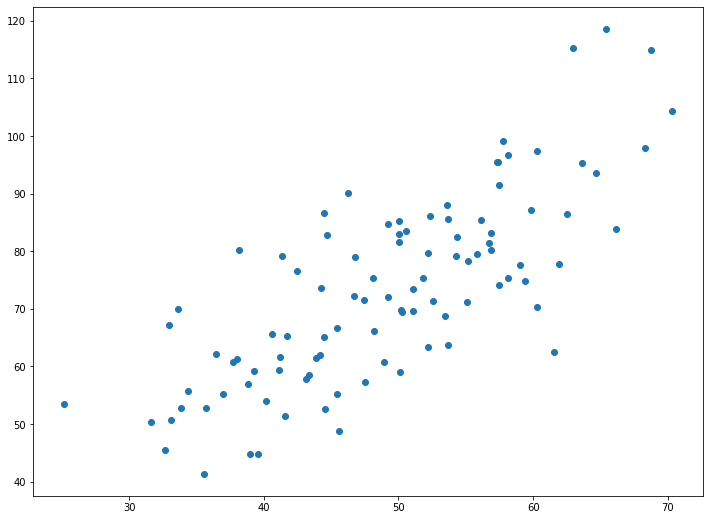

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definindo um tamanho para a figura
plt.figure(figsize=(12,9))

# Pegando os valores do arquivo 'csv'
data = pd.read_csv('data.csv')

# Pegando a 1° coluna
X = data.iloc[:, 0]

# Pegando a 2° coluna
Y = data.iloc[:, 1]

# Gerando um gráfico de dispersão para as amostras
plt.scatter(X, Y)

plt.show()

aaa

1.4796491688889395 0.10148121494753726


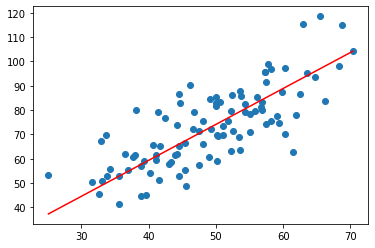

In [13]:
# Suposições iniciais para os parâmetros
m = 0
c = 0

L = 0.0001  # Taxa de aprendizado
epochs = 1000  # Número de iterações para o Gradiente Descendente

n = float(len(X)) # Número de elementos de X

# Aplicando o Método Gradiente 
for i in range(epochs): 
    Y_pred = m*X + c  # Valor atual suposto para Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

### Aplicações
O modelo de regressão linear pode ser utilizado relacionar, por exemplo:
- A altura das pessoas com o seu peso.